In [1]:
import sys
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages')
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/scalpy/')
sys.path.append('/home/aklantbhowmick/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/')
import mdot_to_Lbol
import arepo_package
import scipy.interpolate
radiative_efficiency=0.1
total_conv=mdot_to_Lbol.get_conversion_factor_arepo(radiative_efficiency)
import h5py
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
from nbodykit.source.catalog import ArrayCatalog


def make_image(colormap,image_box_size=700,NMESH=256):
    particle_property='Coordinates'
    group_positions,output_redshift=arepo_package.get_particle_property_within_groups(basePath_uniform,particle_property,p_type,desired_redshift_of_selected_halo,index_of_selected_halo,group_type='groups',list_all=False)
    particle_property='Masses'
    group_mass,output_redshift=arepo_package.get_particle_property_within_groups(basePath_uniform,particle_property,p_type,desired_redshift_of_selected_halo,index_of_selected_halo,group_type='groups',list_all=False)
    #group_positions,output_redshift=arepo_package.get_particle_property(basePath_uniform,particle_property,p_type,desired_redshift_of_selected_halo)
    #group_mass,output_redshift=arepo_package.get_particle_property(basePath_uniform, 'Masses',p_type, desired_redshift_of_selected_halo)
    group_property='GroupPos'
    COM,output_redshift=arepo_package.get_group_property(basePath_uniform,group_property,desired_redshift_of_selected_halo,list_all=False)
    COM=numpy.array([COM[index_of_selected_halo]]*len(group_positions))

    data = numpy.empty(len(group_positions), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data['Position'] = group_positions-COM+image_box_size/2
    data['Mass'] = group_mass*1e10
    # initialize the catalog
    f = ArrayCatalog(data)
    f.attrs['BoxSize']=image_box_size
    mesh = f.to_mesh(Nmesh=NMESH)
    density = mesh.preview(Nmesh=NMESH, axes=(0,1))
    ax.imshow(density,norm=mpl.colors.LogNorm(),cmap=colormap)        
    print("Output redshift:",output_redshift)
    group_property='GroupMassType'
    GroupMassType,output_redshift=arepo_package.get_group_property(basePath_uniform, group_property, desired_redshift_of_selected_halo, list_all=False)
    print("log10 gas mass in Msun/h:",numpy.log10(GroupMassType[index_of_selected_halo][0]*1e10))
    
    print("log10 stellar mass in Msun/h:",numpy.log10(GroupMassType[index_of_selected_halo][4]*1e10))
    
    print("log10 BH + gas reservoir mass in Msun/h:",numpy.log10(GroupMassType[index_of_selected_halo][5]*1e10))

    group_property='GroupBHMass'
    desired_redshift=0.0
    GroupBHMass,output_redshift=arepo_package.get_group_property(basePath_uniform, group_property, desired_redshift_of_selected_halo, list_all=False)
    print("log10 BH  mass in Msun/h:",numpy.log10(GroupBHMass[index_of_selected_halo]*1e10))


    

    
    
    
    ax.tick_params(labelleft='off',labelbottom='off')



Output redshift: 2.220446049250313e-16
log10 gas mass in Msun/h: 10.751206643664252
log10 stellar mass in Msun/h: 10.298311685420487
log10 BH + gas reservoir mass in Msun/h: 7.3573778833790655
log10 BH  mass in Msun/h: 7.3573778833790655
Output redshift: 2.220446049250313e-16
log10 gas mass in Msun/h: 10.751206643664252
log10 stellar mass in Msun/h: 10.298311685420487
log10 BH + gas reservoir mass in Msun/h: 7.3573778833790655
log10 BH  mass in Msun/h: 7.3573778833790655


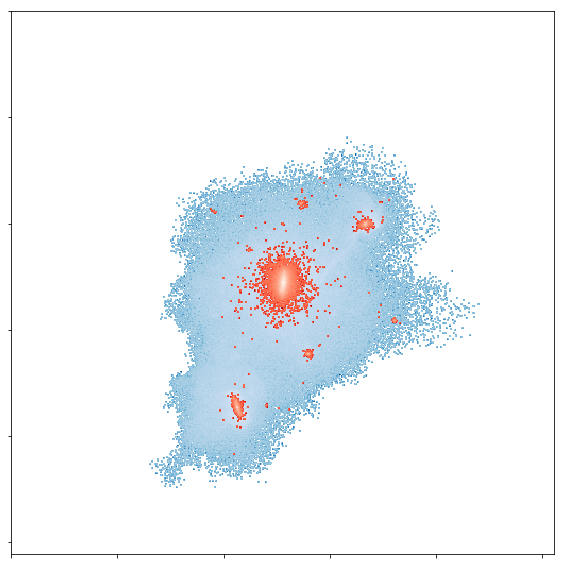

In [28]:
path_to_uniform_run='/ufrc/lblecha/aklantbhowmick/NEW_AREPO_RUNS/'
scaled_halo_centers=[0.439,0.116,0.227]
uniform_run='L25n128MUSIC_rerun_zoom_levelmax10_haloindex100_redshift0.00/AREPO'
basePath_uniform=path_to_uniform_run+uniform_run+'/output/'
boxsize=arepo_package.get_box_size(basePath_uniform)
desired_redshift_of_selected_halo=0
index_of_selected_halo=0


f,ax=plt.subplots(figsize=(10,10))


p_type=0
make_image('Blues_r',NMESH=512)

p_type=4
make_image('Reds_r',NMESH=512)





Output redshift: 2.220446049250313e-16
log10 gas mass in Msun/h: 10.810004375612994
log10 stellar mass in Msun/h: 10.123919576004782
log10 BH + gas reservoir mass in Msun/h: 7.9485675108717
log10 BH  mass in Msun/h: 7.943972602492893
Output redshift: 2.220446049250313e-16
log10 gas mass in Msun/h: 10.810004375612994
log10 stellar mass in Msun/h: 10.123919576004782
log10 BH + gas reservoir mass in Msun/h: 7.9485675108717
log10 BH  mass in Msun/h: 7.943972602492893


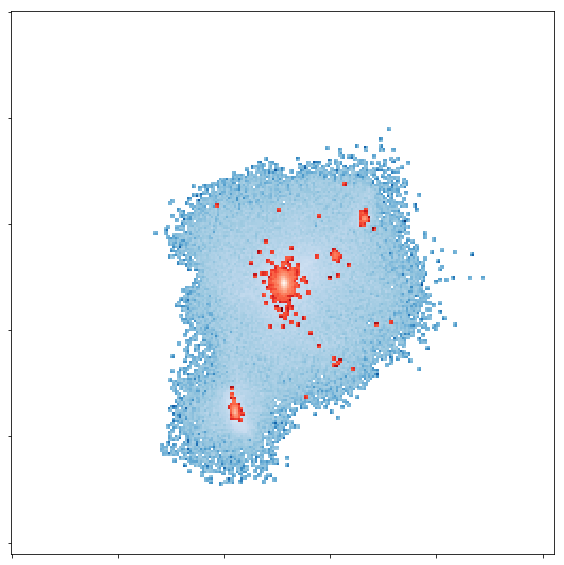

In [27]:
path_to_uniform_run='/ufrc/lblecha/aklantbhowmick/NEW_AREPO_RUNS/'
scaled_halo_centers=[0.439,0.116,0.227]
uniform_run='L25n128MUSIC_rerun_zoom_levelmax9_haloindex100_redshift0.00/AREPO'
basePath_uniform=path_to_uniform_run+uniform_run+'/output/'
boxsize=arepo_package.get_box_size(basePath_uniform)
desired_redshift_of_selected_halo=0
index_of_selected_halo=0


f,ax=plt.subplots(figsize=(10,10))


p_type=0
make_image('Blues_r')

p_type=4
make_image('Reds_r')





Output redshift: 2.220446049250313e-16
log10 gas mass in Msun/h: 10.788321390794376
log10 stellar mass in Msun/h: 9.382938501043864
log10 BH + gas reservoir mass in Msun/h: 8.615366389659654
log10 BH  mass in Msun/h: 6.384905148577013
Output redshift: 2.220446049250313e-16
log10 gas mass in Msun/h: 10.788321390794376
log10 stellar mass in Msun/h: 9.382938501043864
log10 BH + gas reservoir mass in Msun/h: 8.615366389659654
log10 BH  mass in Msun/h: 6.384905148577013


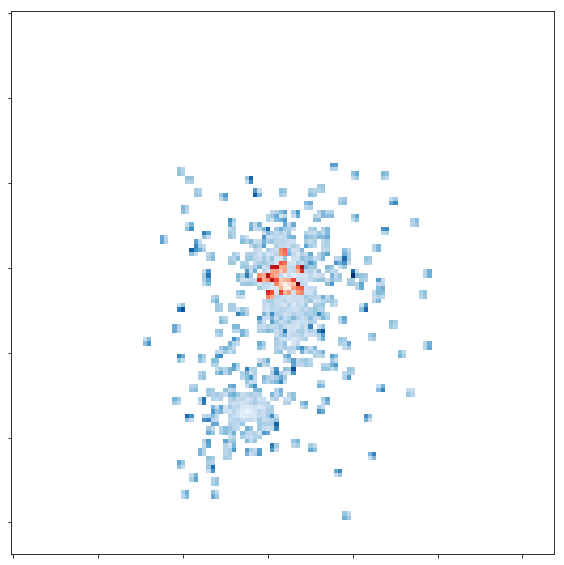

In [24]:
path_to_uniform_run='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/'
scaled_halo_centers=[0.439,0.116,0.227]
uniform_run='L25n128MUSIC_rerun'
basePath_uniform=path_to_uniform_run+uniform_run+'/output/'
boxsize=arepo_package.get_box_size(basePath_uniform)
desired_redshift_of_selected_halo=0
index_of_selected_halo=100
p_type=4

f,ax=plt.subplots(figsize=(10,10))

p_type=0
make_image('Blues_r',NMESH=128)

p_type=4
make_image('Reds_r',NMESH=128)

p_type=5
#make_image('Greys',NMESH=64)
